In [29]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
charg_set = pd.read_csv("charging_sessions.csv", parse_dates= ["connectionTime","disconnectTime","doneChargingTime"])

In [12]:
charg_set

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."


In [13]:
charg_set.describe()

,Unnamed: 0,kWhDelivered,siteID,userID
count,66450.000000,66450.000000,66450.000000,49187.000000
mean,4726.102062,11.787916,1.472656,1800.494582
std,3568.025394,10.314789,0.499256,2617.548614
min,0.000000,0.501000,1.000000,1.000000
25%,1845.000000,5.097000,1.000000,431.000000
50%,3960.000000,9.140000,1.000000,818.000000
75%,7027.000000,14.183000,2.000000,1805.000000
max,15291.000000,108.797242,2.000000,19923.000000


In [14]:
charg_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Unnamed: 0        66450 non-null  int64              
 1   id                66450 non-null  object             
 2   connectionTime    66450 non-null  datetime64[ns, UTC]
 3   disconnectTime    66450 non-null  datetime64[ns, UTC]
 4   doneChargingTime  62362 non-null  datetime64[ns, UTC]
 5   kWhDelivered      66450 non-null  float64            
 6   sessionID         66450 non-null  object             
 7   siteID            66450 non-null  int64              
 8   spaceID           66450 non-null  object             
 9   stationID         66450 non-null  object             
 10  timezone          66450 non-null  object             
 11  userID            49187 non-null  float64            
 12  userInputs        49187 non-null  object             
dtypes

Calculate the average connection and charging times.

In [22]:
charg_set["connectionDuration"] = charg_set["disconnectTime"] - charg_set["connectionTime"]

In [23]:
charg_set["chargingDuration"] = charg_set["doneChargingTime"] - charg_set["connectionTime"]

Utilization: chargin time/total connection time

In [24]:
charg_set["utilization"] = charg_set["chargingDuration"] / charg_set["connectionDuration"]

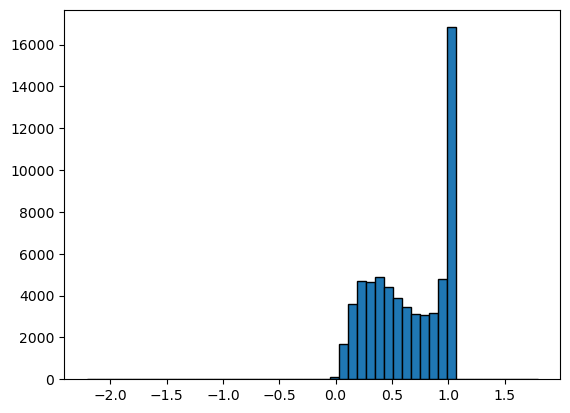

In [31]:
data = charg_set["utilization"]

plt.hist(data, bins=50, edgecolor='k')
plt.show()

In [32]:
charg_set.describe()

,Unnamed: 0,kWhDelivered,siteID,userID,connectionDuration,chargingDuration,utilization
count,66450.000000,66450.000000,66450.000000,49187.000000,66450,62362,62362.000000
mean,4726.102062,11.787916,1.472656,1800.494582,0 days 06:17:34.578209179,0 days 03:32:28.611109329,0.647598
std,3568.025394,10.314789,0.499256,2617.548614,0 days 04:51:41.391314114,0 days 03:03:19.652032849,0.313831
min,0.000000,0.501000,1.000000,1.000000,0 days 00:02:04,-1 days +23:18:38,-2.210151
25%,1845.000000,5.097000,1.000000,431.000000,0 days 02:51:57.750000,0 days 01:38:02,0.364974
50%,3960.000000,9.140000,1.000000,818.000000,0 days 06:11:44,0 days 02:47:01.500000,0.666440
75%,7027.000000,14.183000,2.000000,1805.000000,0 days 09:13:31.500000,0 days 04:44:41.750000,0.996550
max,15291.000000,108.797242,2.000000,19923.000000,10 days 05:16:09,8 days 08:00:57,1.792245


Assumption: utilization cannot be greater than one, so replace for the entries > 1 with = 1

In [36]:
charg_set[charg_set["utilization"] > 1]

,Unnamed: 0,kWhDelivered,siteID,userID,connectionDuration,chargingDuration,utilization
count,4692.000000,4692.000000,4692.000000,3631.000000,4692,4692,4692.000000
mean,5089.696718,14.449495,1.251492,1430.036629,0 days 04:20:23.429667519,0 days 04:21:18.999147485,1.007760
std,3479.088497,12.638064,0.433917,1489.562601,0 days 03:59:39.261617252,0 days 03:59:37.942108123,0.018377
min,0.000000,0.508000,1.000000,22.000000,0 days 00:04:02,0 days 00:04:13,1.000046
25%,1953.000000,5.530000,1.000000,410.000000,0 days 01:49:44,0 days 01:50:45,1.002337
50%,4725.500000,11.318000,1.000000,828.000000,0 days 03:26:26,0 days 03:27:23,1.004260
75%,7932.500000,19.588000,2.000000,2050.000000,0 days 05:54:26,0 days 05:55:24.500000,1.008275
max,15135.000000,108.797242,2.000000,17097.000000,6 days 06:12:59,6 days 06:13:58,1.792245


In [37]:
charg_set[charg_set["utilization"] < 0].describe()

,Unnamed: 0,kWhDelivered,siteID,userID,connectionDuration,chargingDuration,utilization
count,27.000000,27.000000,27.000000,6.000000,27,27,27.000000
mean,7871.481481,2.479419,1.962963,889.500000,0 days 08:55:52.222222222,-1 days +23:55:03.370370371,-0.186907
std,4599.043374,3.555755,0.192450,421.951538,0 days 14:04:59.951537174,0 days 00:11:47.666867962,0.583318
min,492.000000,0.521000,1.000000,483.000000,0 days 00:18:43,-1 days +23:18:38,-2.210151
25%,3395.000000,0.815942,2.000000,527.000000,0 days 03:35:54,-1 days +23:59:00,-0.004516
50%,9082.000000,1.067230,2.000000,857.000000,0 days 05:22:24,-1 days +23:59:01,-0.002939
75%,11650.000000,1.707816,2.000000,1154.000000,0 days 07:17:57.500000,-1 days +23:59:02.500000,-0.001970
max,13406.000000,14.967000,2.000000,1470.000000,2 days 22:59:52,-1 days +23:59:59,-0.000051


Assumption: negative utilization is due to time changes

Since the UserID and userInputs have valid charging data, even though they have missing values, the entries will be kept in the dataset.